# PASSNYC

In [ ]:
# reference
# https://www.kaggle.com/infocusp/holographic-view-of-underperforming-schools/notebook

In [2]:
# Setting
%matplotlib inline

# import  libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
import folium
import sklearn
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.decomposition import PCA
import sklearn
from sklearn.cluster import KMeans
import warnings 
import itertools
import base64
from IPython.display import HTML

warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

In [3]:
# Function converting string % values to int
def percent_to_int(df_in):
    for col in df_in.columns.values:
        if col.startswith("Percent") or col.endswith("%") or col.endswith("Rate"):
            df_in[col] = df_in[col].astype(np.object).str.replace('%','').astype(float)
    return df_in

In [4]:
df_schools_raw = pd.read_csv('data/2016 School Explorer.csv')
df_schools_raw = df_schools_raw[df_schools_raw['Grade High']!='0K']
df_schools_raw = percent_to_int(df_schools_raw)
df_schools_raw['School Income Estimate'] = df_schools_raw['School Income Estimate'].astype(np.object).str.replace('$','').str.replace(',','').str.replace('.','').astype(float)

df_schools_relevant_grade = df_schools_raw[df_schools_raw['Grade High'].astype(int) > 5]

high_nan_columns = df_schools_raw.columns[df_schools_raw.isnull().mean() > 0.95]
# print("Here are the fields having >95% NaNs which we can drop: \n")
# print(list(high_nan_columns))

df_schools = df_schools_relevant_grade.drop(high_nan_columns, axis=1)
print("We have %d relevant schools and %d fields describing the school/ students"%(df_schools.shape))

We have 626 relevant schools and 158 fields describing the school/ students


In [5]:
def plot_city_hist(df_schools, title_str):
    layout = go.Layout(
            title = title_str,
            xaxis = dict(
                    title = 'City',
                    titlefont = dict(
                            family = 'Arial, sans-serif',
                            size = 12,
                            color = 'black'
                    ),
                    showticklabels = True,
                    tickangle = 315,
                    tickfont = dict(
                            size = 10,
                            color = 'grey'
                    )
            )
        )
    data = [go.Histogram(x = df_schools['City'])]
    fig = go.Figure(data = data, layout = layout)
    return fig

In [6]:
fig = plot_city_hist(df_schools, 'City wise School Distribution')
iplot(fig)

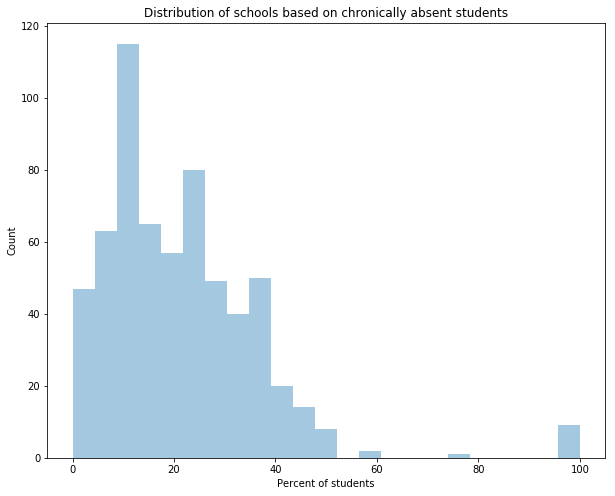

In [7]:
plt.figure(figsize = [10,8])
df_schools = df_schools.dropna(subset = ['Percent of Students Chronically Absent'])

temp = sns.distplot(df_schools[['Percent of Students Chronically Absent']].values, kde = False)
temp = plt.title('Distribution of schools based on chronically absent students')
temp = plt.xlabel("Percent of students")
temp = plt.ylabel("Count")

In [8]:
chronically_absent_foi = ['School Name', 'Percent of Students Chronically Absent','Percent Black / Hispanic','Economic Need Index']

df_schools_ca = df_schools[df_schools['Percent of Students Chronically Absent'] > 40]
df_schools_nca = df_schools[df_schools['Percent of Students Chronically Absent'] < 5]

df_schools_ca[chronically_absent_foi].sort_values('Percent of Students Chronically Absent', ascending = False)

,School Name,Percent of Students Chronically Absent,Percent Black / Hispanic,Economic Need Index
1261,SUCCESS ACADEMY CHARTER SCHOOL - BRONX 2,100.0,98.0,0.794
1260,SUCCESS ACADEMY CHARTER SCHOOL - BRONX 1,100.0,96.0,0.825
1206,SUCCESS ACADEMY CHARTER SCHOOL - UPPER WEST,100.0,48.0,0.369
1203,SUCCESS ACADEMY CHARTER SCHOOL - HARLEM 5,100.0,95.0,0.789
1198,SUCCESS ACADEMY CHARTER SCHOOL - HARLEM 4,100.0,94.0,0.711
1197,SUCCESS ACADEMY CHARTER SCHOOL - HARLEM 3,100.0,94.0,0.720
1196,SUCCESS ACADEMY CHARTER SCHOOL - HARLEM 2,100.0,97.0,0.734
1173,BROOKLYN LAB CHARTER SCHOOL,100.0,89.0,0.639
1121,SUCCESS ACADEMY CHARTER SCHOOL - BED-STUY 1,100.0,96.0,0.750
300,NEW DIRECTIONS SECONDARY SCHOOL,74.0,98.0,0.920


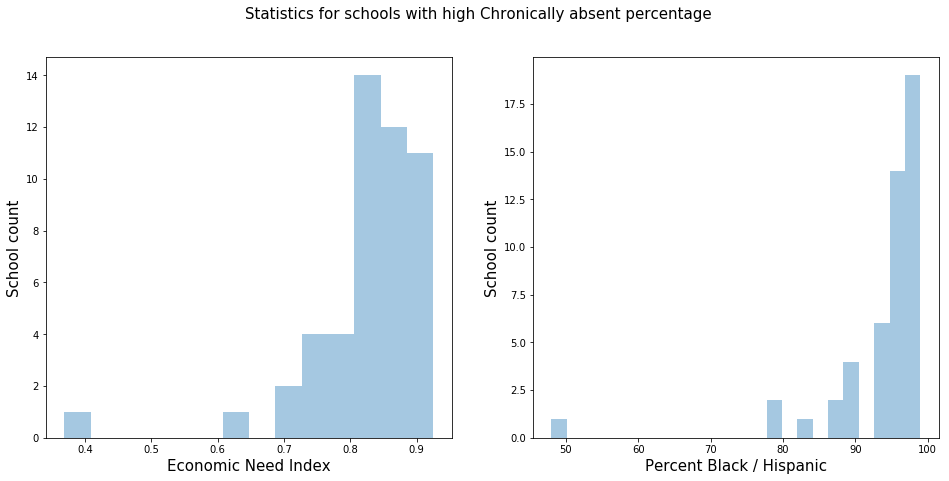

In [9]:
plt.figure(figsize = [16,7])
plt.suptitle('Statistics for schools with high Chronically absent percentage', fontsize=15)
plt.subplot(1,2,1)
temp = sns.distplot(df_schools_ca[['Economic Need Index']].values, kde = False)
temp = plt.xlabel("Economic Need Index", fontsize = 15)
temp = plt.ylabel("School count", fontsize = 15)
plt.subplot(1,2,2)
temp = sns.distplot(df_schools_ca[['Percent Black / Hispanic']].values, kde = False)
temp = plt.xlabel("Percent Black / Hispanic", fontsize = 15)
temp = plt.ylabel("School count", fontsize = 15)

In [10]:
print ('1) ENI Statistics for schools with high % of chronically absent students')
print('\t * Mean value: %f'%df_schools_ca['Economic Need Index'].mean())
print ('\t * Median value : %f'%df_schools_ca['Economic Need Index'].median())
print('2) %d schools have > 40%% students chronically absent'%(df_schools_ca.shape[0]))

1) ENI Statistics for schools with high % of chronically absent students
	 * Mean value: 0.824531
	 * Median value : 0.835000
2) 49 schools have > 40% students chronically absent


In [11]:
features_list = ['Rigorous Instruction %',
'Collaborative Teachers %',
'Supportive Environment %',
'Effective School Leadership %',
'Strong Family-Community Ties %',
'Trust %']

df_schools[['School Name'] + features_list ].head()

,School Name,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
3,P.S. 034 FRANKLIN D. ROOSEVELT,85.0,78.0,82.0,73.0,89.0,88.0
8,P.S. 140 NATHAN STRAUS,94.0,91.0,85.0,87.0,83.0,93.0
10,P.S. 184M SHUANG WEN,90.0,81.0,91.0,67.0,83.0,85.0
11,P.S. 188 THE ISLAND SCHOOL,100.0,100.0,99.0,99.0,92.0,99.0
12,ORCHARD COLLEGIATE ACADEMY,72.0,77.0,77.0,72.0,76.0,87.0


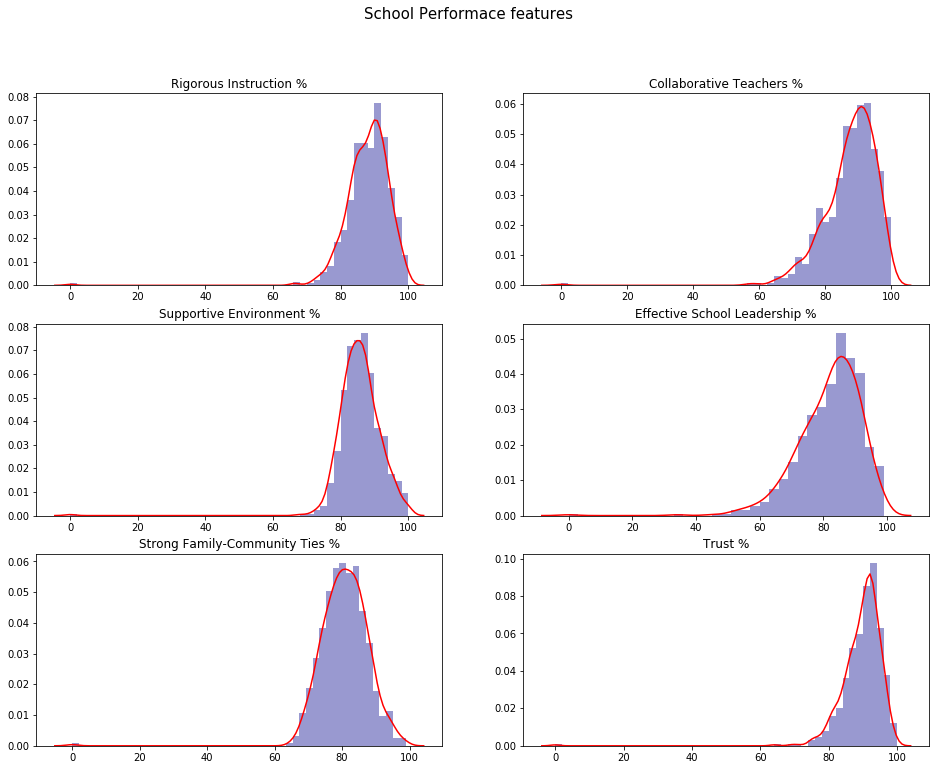

In [12]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (16,12))
for i in range(3):
    for j in range(2):
        ax[i, j].set_title(features_list[i*2+j])
        sns.distplot(a = df_schools[features_list[i*2+j]].dropna().values, kde_kws={"color":"red"}, color = 'darkblue', ax = ax[i,j])
        
# fig.tight_layout()
temp = fig.suptitle('School Performace features', fontsize = 15)

In [13]:
df_schools[features_list].corr()

,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
Rigorous Instruction %,1.000000,0.757568,0.720514,0.643093,0.540730,0.708931
Collaborative Teachers %,0.757568,1.000000,0.594114,0.915435,0.485351,0.882959
Supportive Environment %,0.720514,0.594114,1.000000,0.488354,0.581007,0.714141
Effective School Leadership %,0.643093,0.915435,0.488354,1.000000,0.444356,0.853213
Strong Family-Community Ties %,0.540730,0.485351,0.581007,0.444356,1.000000,0.588877
Trust %,0.708931,0.882959,0.714141,0.853213,0.588877,1.000000


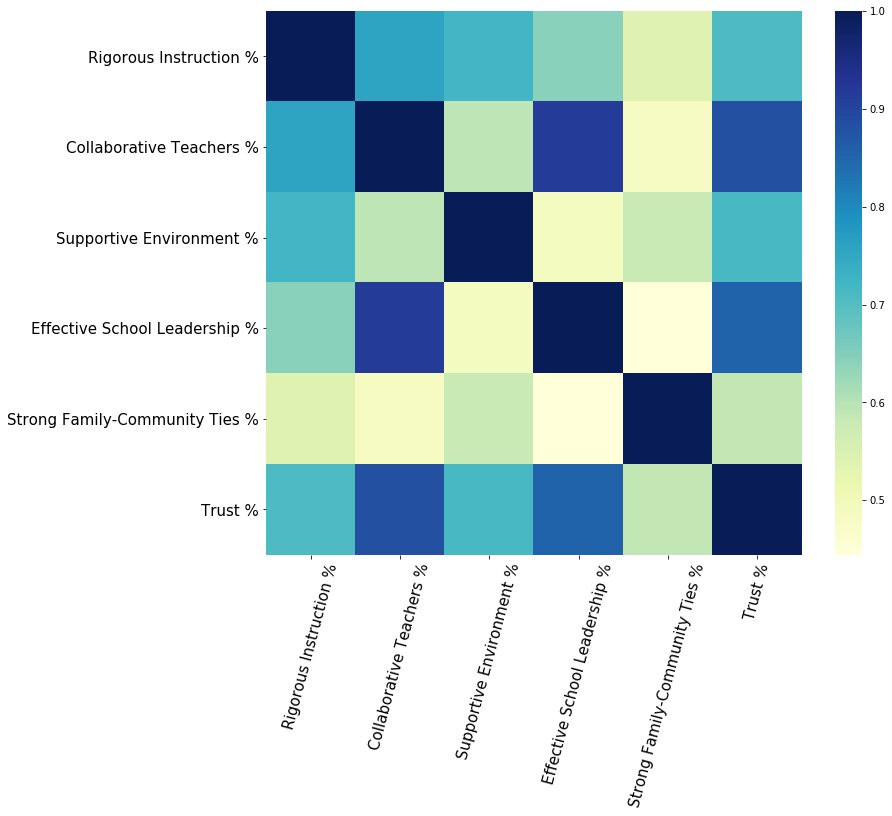

In [14]:
corr = df_schools[features_list].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='YlGnBu')
temp = plt.xticks(rotation=75, fontsize=15) 
temp = plt.yticks(fontsize=15) 

In [15]:
correlated_features_list = ["Effective School Leadership %","Collaborative Teachers %","Trust %"]
corr_features_values = df_schools[correlated_features_list].values

pca = PCA(n_components=1)
combined_feature_value = pca.fit_transform(corr_features_values)
df_schools['PCA Combined Feature'] = combined_feature_value
#df_schools[correlated_features_list + ['PCA Combined Feature']].corr()

In [16]:
scaler = sklearn.preprocessing.MinMaxScaler()
scale_factor = 2*(df_schools['PCA Combined Feature'].corr(df_schools["Effective School Leadership %"])>0) -1 

df_schools['PCA Combined Feature'] =  scaler.fit_transform(scale_factor * df_schools['PCA Combined Feature'].values.reshape(-1,1))*100

In [17]:
print ("The correlation between the three correlated features and their PCA is shown below:")
df_schools[correlated_features_list + ['PCA Combined Feature']].corr()

The correlation between the three correlated features and their PCA is shown below:


,Effective School Leadership %,Collaborative Teachers %,Trust %,PCA Combined Feature
Effective School Leadership %,1.000000,0.915435,0.853213,0.979714
Collaborative Teachers %,0.915435,1.000000,0.882959,0.970069
Trust %,0.853213,0.882959,1.000000,0.920314
PCA Combined Feature,0.979714,0.970069,0.920314,1.000000


In [18]:
features = ['Rigorous Instruction %','Supportive Environment %','PCA Combined Feature',
            'Strong Family-Community Ties %']

weights = [0.8, 1, 0.7, 0.5]
df_schools['SPI'] = df_schools[features].dot(weights)
print ("A glimpse of the School Performance Index (SPI) :")
df_schools[features+['SPI']].head(5)

A glimpse of the School Performance Index (SPI) :


,Rigorous Instruction %,Supportive Environment %,PCA Combined Feature,Strong Family-Community Ties %,SPI
3,85.0,82.0,78.859046,89.0,249.701332
8,94.0,85.0,90.408101,83.0,264.985671
10,90.0,91.0,76.608591,83.0,258.126014
11,100.0,99.0,100.000000,92.0,295.000000
12,72.0,77.0,77.852373,76.0,227.096661


In [19]:
df_low_spi_schools = df_schools[df_schools['SPI'] < df_schools['SPI'].quantile(.25)]
df_high_spi_schools = df_schools[df_schools['SPI'] > df_schools['SPI'].quantile(.25)]

In [20]:
fig = plot_city_hist(df_low_spi_schools, 'Distribution of low SPI schools by city')
iplot(fig)

In [21]:
print ("Average ELA / Math performance for the high SPI schools")
df_high_spi_schools[['Average ELA Proficiency','Average Math Proficiency']].mean()

Average ELA / Math performance for the high SPI schools


Average ELA Proficiency     2.592795
Average Math Proficiency    2.703537
dtype: float64

In [22]:
print ("Average ELA / Math performance for the low SPI schools")
df_low_spi_schools[['Average ELA Proficiency','Average Math Proficiency']].mean()

Average ELA / Math performance for the low SPI schools


Average ELA Proficiency     2.366839
Average Math Proficiency    2.370323
dtype: float64

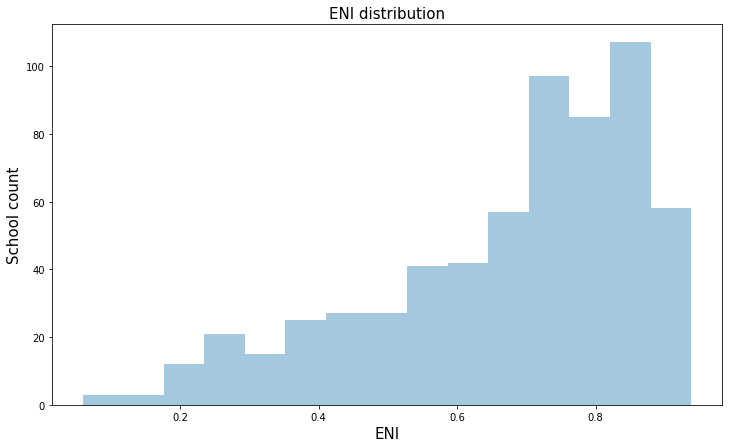

In [23]:
plt.figure(figsize=(12,7))
temp = sns.distplot(df_schools[['Economic Need Index']].values, kde=False)
temp= plt.title("ENI distribution", fontsize=15)
temp = plt.xlabel("ENI", fontsize=15)
temp = plt.ylabel("School count", fontsize=15)

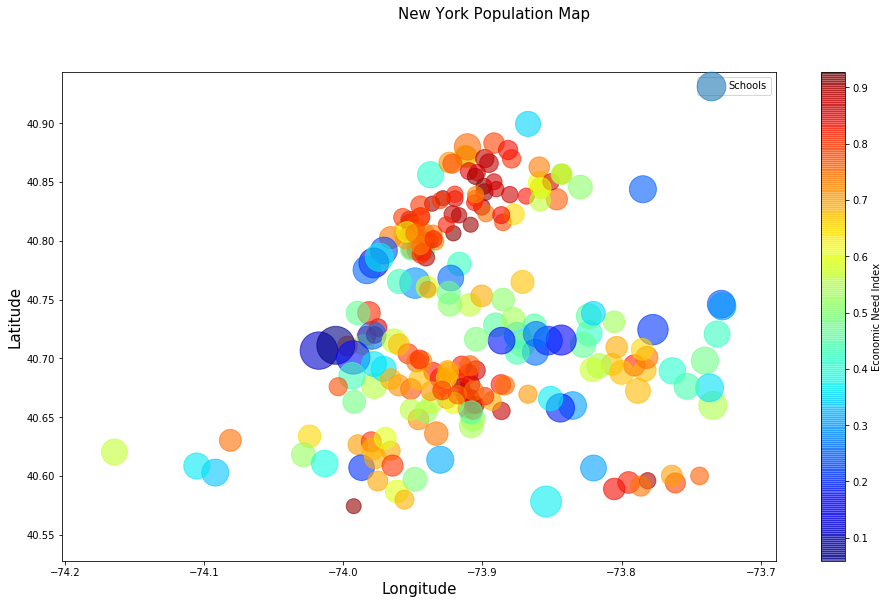

In [24]:
fig,ax = plt.subplots(figsize=(16,9))
fig.suptitle('New York Population Map', fontsize=15)
ax = df_schools.plot(kind="scatter", x="Longitude", y="Latitude",
                    s=df_schools['School Income Estimate']/10000, c="Economic Need Index",
                    cmap=plt.get_cmap("jet"), label='Schools', colorbar=True, alpha=0.6, ax=ax)
temp = ax.set_ylabel('Latitude', fontsize=15)
temp = ax.set_xlabel('Longitude', fontsize=15)

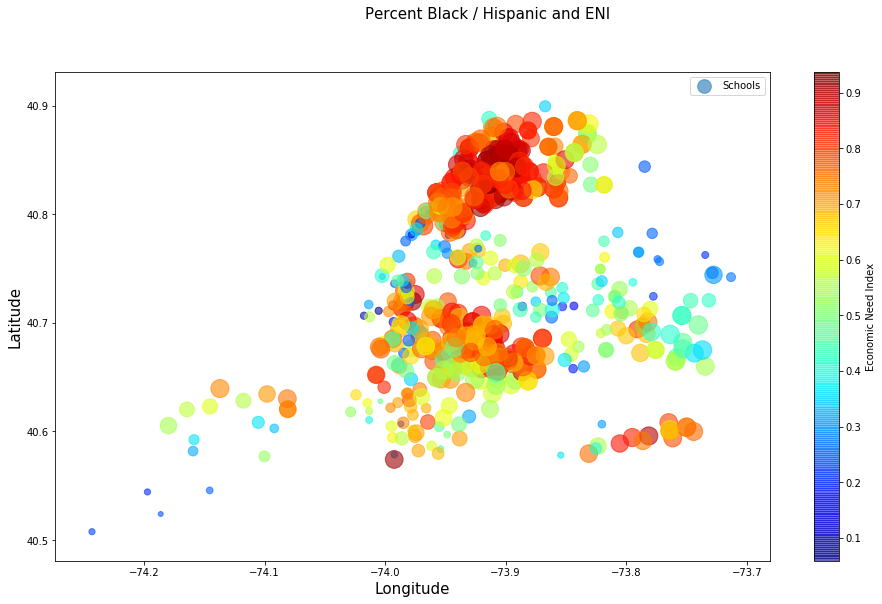

In [25]:
fig, ax = plt.subplots(figsize=(16,9))
fig.suptitle('Percent Black / Hispanic and ENI', fontsize=15)
ax = df_schools.plot(kind="scatter", x="Longitude", y="Latitude", 
                   c='Economic Need Index', s=df_schools["Percent Black / Hispanic"]*3.5, cmap=plt.get_cmap("jet"), 
                   label='Schools', colorbar=True, alpha=0.6, ax=ax)
temp = ax.set_ylabel('Latitude', fontsize=15)
temp = ax.set_xlabel('Longitude', fontsize=15)

In [26]:
lower_bound = df_schools['Economic Need Index'].quantile(0.75)
df_schools_high_eni = df_schools[df_schools['Economic Need Index'] > lower_bound]
df_schools_low_eni = df_schools[df_schools['Economic Need Index'] < 0.25]

In [27]:
df_schools_high_eni[['School Name', 'Economic Need Index', 'Percent Black / Hispanic']].sort_values('Economic Need Index', ascending = False).head()

,School Name,Economic Need Index,Percent Black / Hispanic
298,NEW MILLENNIUM BUSINESS ACADEMY MIDDLE SCHOOL,0.938,98.0
283,I.S. 219 NEW VENTURE SCHOOL,0.929,98.0
1247,MOTT HAVEN ACADEMY CHARTER SCHOOL,0.928,98.0
762,BROWNSVILLE COLLABORATIVE MIDDLE SCHOOL,0.925,96.0
300,NEW DIRECTIONS SECONDARY SCHOOL,0.920,98.0


In [28]:
print ("Average ELA / Math performance for the high ENI schools")
df_schools_high_eni[['Average ELA Proficiency','Average Math Proficiency']].mean()

Average ELA / Math performance for the high ENI schools


Average ELA Proficiency     2.247792
Average Math Proficiency    2.261688
dtype: float64

In [29]:
print ("Average ELA / Math performance for the low ENI schools")
df_schools_low_eni[['Average ELA Proficiency','Average Math Proficiency']].mean()

Average ELA / Math performance for the low ENI schools


Average ELA Proficiency     3.267917
Average Math Proficiency    3.422083
dtype: float64

In [30]:
def find_schools_with_black_high_4s_low(df, grade = 5, black_per_threshold = 90, all_students_threshold = 5):
    math_black_students = "Grade {} Math 4s - Black or African American".format(grade)
    math_hispanic_students = "Grade {} Math 4s - Hispanic or Latino".format(grade)
    math_all_students = "Grade {} Math 4s - All Students".format(grade)
    
    df_schools_copy = df.copy()
    df_schools_copy['4s ratio black / hispanic'] = ((df_schools_copy[math_black_students] + df_schools_copy[math_hispanic_students])/ df_schools_copy[math_all_students]).values
    df_schools_black_4s = df_schools_copy[np.logical_and(df_schools_copy['Percent Black / Hispanic'] > black_per_threshold, df_schools_copy[math_all_students] > all_students_threshold)]
    df_schools_black_4s.dropna(inplace=True)
    
    df_schools_black_4s_low = df_schools_black_4s[df_schools_black_4s['4s ratio black / hispanic'] < 0.5]
    num_schools = len(df_schools_black_4s_low)                      
    
    return df_schools_black_4s_low

In [31]:
schools_with_black_high_4s_low = []

for grade in range(5,9):
    df_schools_with_black_high_4s_low = find_schools_with_black_high_4s_low(df_schools, grade=grade)
    schools_with_black_high_4s_low.extend(np.unique(df_schools_with_black_high_4s_low['School Name']))

schools_with_black_high_4s_low = list(set(schools_with_black_high_4s_low))

In [32]:
schools_with_black_high_4s_low

['BRONX ACADEMY OF PROMISE CHARTER SCHOOL',
 'WASHINGTON HEIGHTS ACADEMY',
 'ICAHN CHARTER SCHOOL 4',
 'HARLEM PREP CHARTER SCHOOL',
 'P.S. 235 JANICE MARIE KNIGHT SCHOOL',
 'P.S. 108 ASSEMBLYMAN ANGELO DEL TORO EDUCATIONAL COMPLEX',
 'BRONX CHARTER SCHOOL FOR THE ARTS',
 'ACHIEVEMENT FIRST CROWN HEIGHTS CHARTER SCHOOL',
 'SUCCESS ACADEMY CHARTER SCHOOL - BRONX 2',
 'ACHIEVEMENT FIRST EAST NEW YORK CHARTER SCHOOL',
 'ICAHN CHARTER SCHOOL',
 'P.S. 129 JOHN H. FINLEY',
 'BUSHWICK ASCEND CHARTER SCHOOL',
 'HARLEM VILLAGE ACADEMY LEADERSHIP CHARTER SCHOOL',
 'THE GORDON PARKS SCHOOL']

In [33]:
df_filtered_schools = df_schools[df_schools['School Name'].isin(schools_with_black_high_4s_low)]
df_filtered_schools[['School Name', 'City', 'Economic Need Index', 'SPI']]

,School Name,City,Economic Need Index,SPI
116,P.S. 108 ASSEMBLYMAN ANGELO DEL TORO EDUCATION...,NEW YORK,0.843,250.659931
137,P.S. 129 JOHN H. FINLEY,NEW YORK,0.854,253.848145
189,WASHINGTON HEIGHTS ACADEMY,NEW YORK,0.777,273.752232
601,P.S. 235 JANICE MARIE KNIGHT SCHOOL,BROOKLYN,0.520,265.985192
990,THE GORDON PARKS SCHOOL,ROSEDALE,0.358,255.315343
1116,ACHIEVEMENT FIRST CROWN HEIGHTS CHARTER SCHOOL,BROOKLYN,0.570,247.994694
1118,ACHIEVEMENT FIRST EAST NEW YORK CHARTER SCHOOL,BROOKLYN,0.693,265.012899
1171,BUSHWICK ASCEND CHARTER SCHOOL,BROOKLYN,0.760,243.979200
1189,HARLEM VILLAGE ACADEMY LEADERSHIP CHARTER SCHOOL,NEW YORK,0.722,249.109716
1210,HARLEM PREP CHARTER SCHOOL,NEW YORK,0.815,258.132590


In [34]:
school_map = folium.Map([df_filtered_schools['Latitude'].mean(), df_filtered_schools['Longitude'].mean()],
                       zoom_start=11, tiles='Stamen Terrain')

for index in df_filtered_schools.index:
    row = df_filtered_schools.loc[index]
    school_name = str(row['School Name'])
    color = 'blue'
    folium.Marker([row['Latitude'], row['Longitude']], popup=school_name, icon=folium.Icon(color=color)).add_to(school_map)

school_map

In [35]:
df_crime = pd.read_csv('data/2010-2016-school-safety-report.csv')

intersection = set(df_crime['DBN']).intersection(set(df_schools['Location Code']))
print('%d schools found in the supplementary dataset out of %d in original dataset'%(len(intersection), len(df_schools)))

crimes_col = ['Major N', 'Oth N', 'NoCrim N', 'Prop N', 'Vio N']
crimes = df_crime.groupby(['DBN'], as_index=False)[crimes_col].sum()
merged_safety_df = pd.merge(crimes[crimes_col + ['DBN']], df_schools, how='inner', left_on=['DBN'], right_on=['Location Code'])
merged_safety_df.dropna(subset=crimes_col, inplace=True, how='all')

541 schools found in the supplementary dataset out of 620 in original dataset


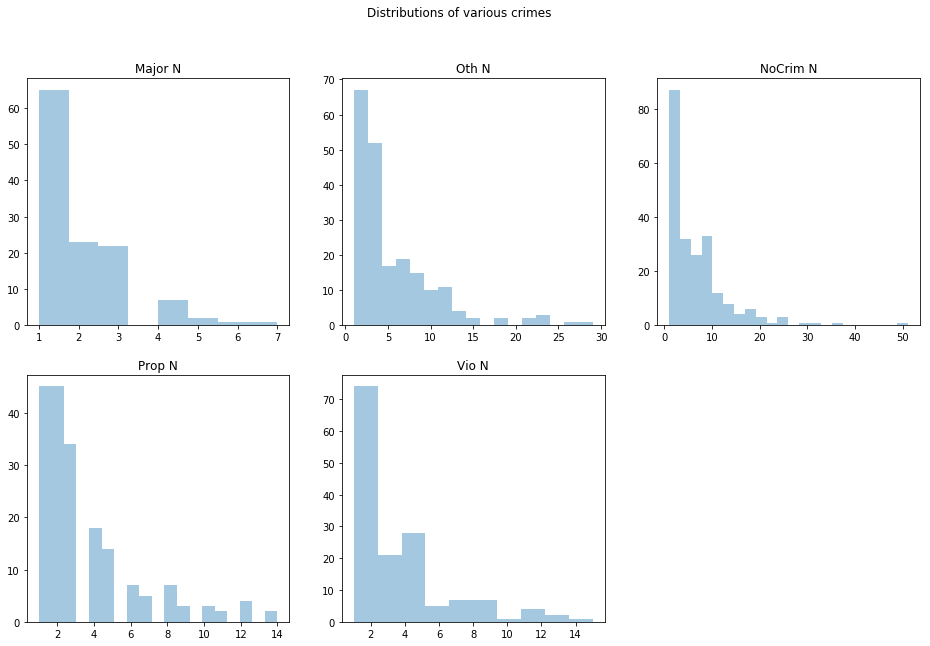

In [36]:
def plot_crime_histogram(column_name, ax):
    sns.distplot(merged_safety_df[column_name][merged_safety_df[column_name]!=0], ax=ax, kde=False)
    ax.set_title(column_name)
    ax.set_xlabel('')
    
fig, ax = plt.subplots(2, 3, figsize = [16, 10])    
fig.suptitle("Distributions of various crimes")
for i, column_name in enumerate(crimes_col):
    plot_crime_histogram(column_name, ax[int(i/3), i%3])
ax[1, 2].remove()

In [37]:
'''
Filtering out the data-frame where Violent Crimes are greater than 4, and Major Crimes are greater than 2.
'''
violent_df = merged_safety_df[merged_safety_df['Vio N'] > 4]
major_crime_df = merged_safety_df[merged_safety_df['Major N'] > 2]

In [38]:
corr = crimes[crimes_col].corr()
corr

,Major N,Oth N,NoCrim N,Prop N,Vio N
Major N,1.000000,0.746759,0.682164,0.807288,0.772462
Oth N,0.746759,1.000000,0.869463,0.932849,0.890065
NoCrim N,0.682164,0.869463,1.000000,0.785599,0.800293
Prop N,0.807288,0.932849,0.785599,1.000000,0.744577
Vio N,0.772462,0.890065,0.800293,0.744577,1.000000


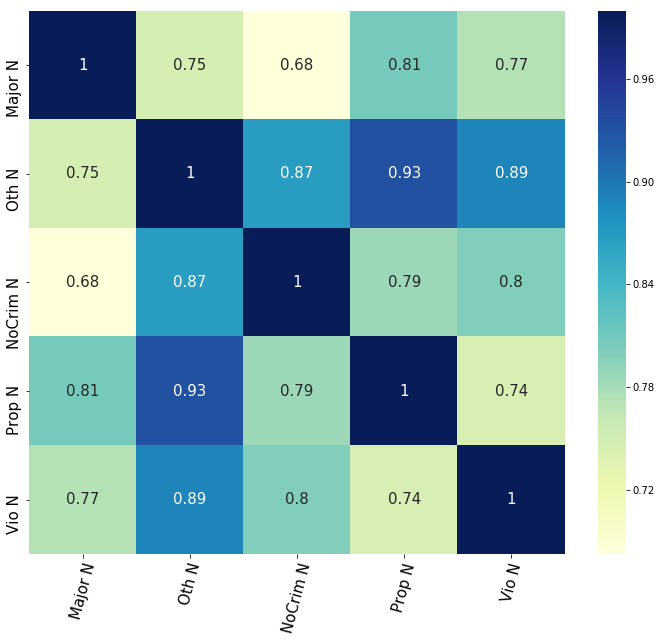

In [39]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt='0.2g',  annot_kws={"size": 15})
temp = plt.xticks(rotation=75, fontsize=15) 
temp = plt.yticks(fontsize=15) 

In [40]:
features_pca = merged_safety_df[crimes_col].values

school_crime_pca = PCA(n_components=1)
school_crime_pca.fit(features_pca)
reduced_crime_features = school_crime_pca.transform(features_pca)
print("The explained variance ratio (the amount of data covered by the PCA feature) is : " + str(school_crime_pca.explained_variance_ratio_[0]))

The explained variance ratio (the amount of data covered by the PCA feature) is : 0.8875596243217347


In [41]:
scaler = sklearn.preprocessing.MinMaxScaler()
adjusted_reduced_crime_features = scaler.fit_transform(reduced_crime_features)

merged_safety_df['SRI'] = adjusted_reduced_crime_features

print('Correlation of risk measure with different features: ')
print('School Performance Index: '  + str(merged_safety_df['SRI'].corr(merged_safety_df['SPI'])))
print('Percent of Students Chronically Absent: '  + str(merged_safety_df['SRI'].corr(merged_safety_df['Percent of Students Chronically Absent'])))

Correlation of risk measure with different features: 
School Performance Index: -0.2322798654847874
Percent of Students Chronically Absent: 0.10948647954632296


In [42]:
risky_schools_df = merged_safety_df[merged_safety_df['SRI']>merged_safety_df['SRI'].quantile(0.9)]
print ("The number of risky schools in top 10 percentile are " + str(risky_schools_df.shape[0]))

The number of risky schools in top 10 percentile are 54


In [43]:
risky_schools_df[['School Name','SRI']].sort_values('SRI', ascending=False)

,School Name,SRI
164,J.H.S. 118 WILLIAM W. NILES,1.000000
488,I.S. 027 ANNING S. PRALL,0.918539
215,EAST BRONX ACADEMY FOR THE FUTURE,0.768927
493,I.S. 051 EDWIN MARKHAM,0.745404
494,I.S. 061 WILLIAM A MORRIS,0.696211
75,FREDERICK DOUGLASS ACADEMY,0.675298
31,LIFE SCIENCES SECONDARY SCHOOL,0.675066
263,M.S. 061 DR. GLADSTONE H. ATWELL,0.624016
192,I.S. 181 PABLO CASALS,0.510102
294,P.S. 306 ETHAN ALLEN,0.478654


## Student to Teacher Ratio (STR)

In [44]:
field_name = "SCHOOLWIDE PUPIL-TEACHER RATIO"
df_school_detail = pd.read_csv('data/2010-2011-class-size-school-level-detail.csv')
df_school_detail["CSD"] =  df_school_detail['CSD'].astype('str').astype(np.object_).str.zfill(2)
df_school_detail["DBN_manual"] = df_school_detail["CSD"] + df_school_detail["SCHOOL CODE"] 
df_school_detail.dropna(subset=[field_name], inplace=True)

In [45]:
merged_str_df = pd.merge(df_school_detail, df_schools, how='inner', left_on=['DBN_manual'], right_on=['Location Code'])

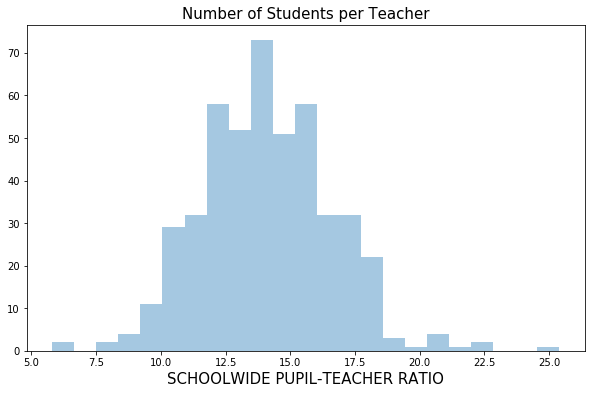

In [46]:
plt.figure(figsize=(10,6))
sns.distplot(merged_str_df[field_name], kde=False)
# merged_str_df[field_name].hist()
temp = plt.title("Number of Students per Teacher", fontsize=15)
temp = plt.xlabel(field_name, fontsize=15)

In [47]:
higher_ratio_str_df = merged_str_df[merged_str_df[field_name].astype(float)>18]
lower_ratio_str_df = merged_str_df[merged_str_df[field_name].astype(float)<12.5]

In [48]:
print ("Average statistics for the schools with high STR")
higher_ratio_str_df[['Average ELA Proficiency','Average Math Proficiency', 'Collaborative Teachers %', 'SPI','Percent Black / Hispanic','Economic Need Index']].mean()

Average statistics for the schools with high STR


Average ELA Proficiency       3.132308
Average Math Proficiency      3.277692
Collaborative Teachers %     89.115385
SPI                         259.299661
Percent Black / Hispanic     44.000000
Economic Need Index           0.436885
dtype: float64

In [49]:
print ("Average statistics for the schools with low STR")
lower_ratio_str_df[['Average ELA Proficiency','Average Math Proficiency', 'Collaborative Teachers %', 'SPI','Percent Black / Hispanic','Economic Need Index']].mean()

Average statistics for the schools with low STR


Average ELA Proficiency       2.310083
Average Math Proficiency      2.300826
Collaborative Teachers %     86.652893
SPI                         256.762657
Percent Black / Hispanic     87.595041
Economic Need Index           0.783099
dtype: float64

In [50]:
df_schools_clustering = df_schools.copy()
df_schools_clustering = df_schools_clustering.dropna(subset=['Longitude', 'Latitude'])
df_schools_clustering = df_schools_clustering[df_schools_clustering['SPI'] < df_schools_clustering['SPI'].quantile(0.25)]
df_schools_clustering = df_schools_clustering[df_schools_clustering['Economic Need Index'] > 0.8]

In [51]:
print ("The number of schools with low SPI and high ENI is : " + str(len(df_schools_clustering)))

The number of schools with low SPI and high ENI is : 57


In [52]:
model = KMeans(n_clusters=4)
model.fit(df_schools_clustering[['Longitude', 'Latitude']].values)
model.cluster_centers_
color = 'blue'

In [54]:
school_map = folium.Map([model.cluster_centers_[:,1].mean(), model.cluster_centers_[:,0].mean()],
                       zoom_start=11, tiles='Stamen Terrain')

for row in model.cluster_centers_:
    folium.Marker([row[1], row[0]], icon=folium.Icon(color='red')).add_to(school_map)

for index in df_schools_clustering.index:
    row = df_schools_clustering.loc[index]
#     if row['Economic Need Index'] > 0.8 and row['SPI'] < 243.55:
    popup_text = "Economic Need Index : " + str(round(row['Economic Need Index'], 3)) + ' , SPI : ' + str(round(row['SPI'], 3))
    folium.Marker([row['Latitude'], row['Longitude']], popup=popup_text, icon=folium.Icon(color='blue')).add_to(school_map)

school_map

## SHSAT Data Analysis

In [55]:
shsat_df = pd.read_csv('data/D5 SHSAT Registrations and Testers.csv')
shsat_df.head()

,DBN,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
0,05M046,P.S. 046 Arthur Tappan,2013,8,91,31,14
1,05M046,P.S. 046 Arthur Tappan,2014,8,95,26,7
2,05M046,P.S. 046 Arthur Tappan,2015,8,73,21,10
3,05M046,P.S. 046 Arthur Tappan,2016,8,56,20,8
4,05M123,P.S. 123 Mahalia Jackson,2013,8,62,31,14


In [56]:
shsat_df['Took Percentage'] = shsat_df['Number of students who took the SHSAT'] / shsat_df['Number of students who registered for the SHSAT']

In [57]:
shsat_sorted_df = shsat_df.groupby(['DBN','School name'], as_index=False).sum()
shsat_sorted_df.head()

,DBN,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT,Took Percentage
0,05M046,P.S. 046 Arthur Tappan,8058,32,315,98,39,1.597034
1,05M123,P.S. 123 Mahalia Jackson,8058,32,241,84,37,1.700780
2,05M129,P.S. 129 John H. Finley,8058,32,252,108,48,2.396452
3,05M148,Eagle Academy for Young Men of Harlem,6047,25,222,12,11,1.857143
4,05M157,The Urban Assembly School for Global Commerce,8058,36,309,7,3,1.333333


In [58]:
shsat_sorted_df = shsat_df.groupby(['DBN','School name'], as_index=False).sum()
shsat_sorted_df = shsat_sorted_df[['DBN','School name', 
                                 'Enrollment on 10/31', 
                                 'Number of students who registered for the SHSAT', 
                                 'Number of students who took the SHSAT']].join(shsat_df[['Year of SHST', 
                                                                                          'Grade level']], how='inner')
shsat_sorted_df = shsat_sorted_df.sort_values('Number of students who registered for the SHSAT',ascending=False)

In [59]:
shsat_sorted_df.head()

,DBN,School name,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT,Year of SHST,Grade level
22,84M336,KIPP Infinity Charter School,494,296,65,2016,8
29,84M726,KIPP STAR College Prep Charter School,292,292,96,2015,8
10,05M362,Columbia Secondary School,794,253,179,2015,8
20,84M065,Democracy Prep Endurance Charter School,567,194,94,2014,8
24,84M350,Democracy Prep Charter School,943,145,100,2014,8


In [60]:
shsat_sorted_df['Took Percentage'] = shsat_sorted_df['Number of students who took the SHSAT'] / shsat_sorted_df['Number of students who registered for the SHSAT']

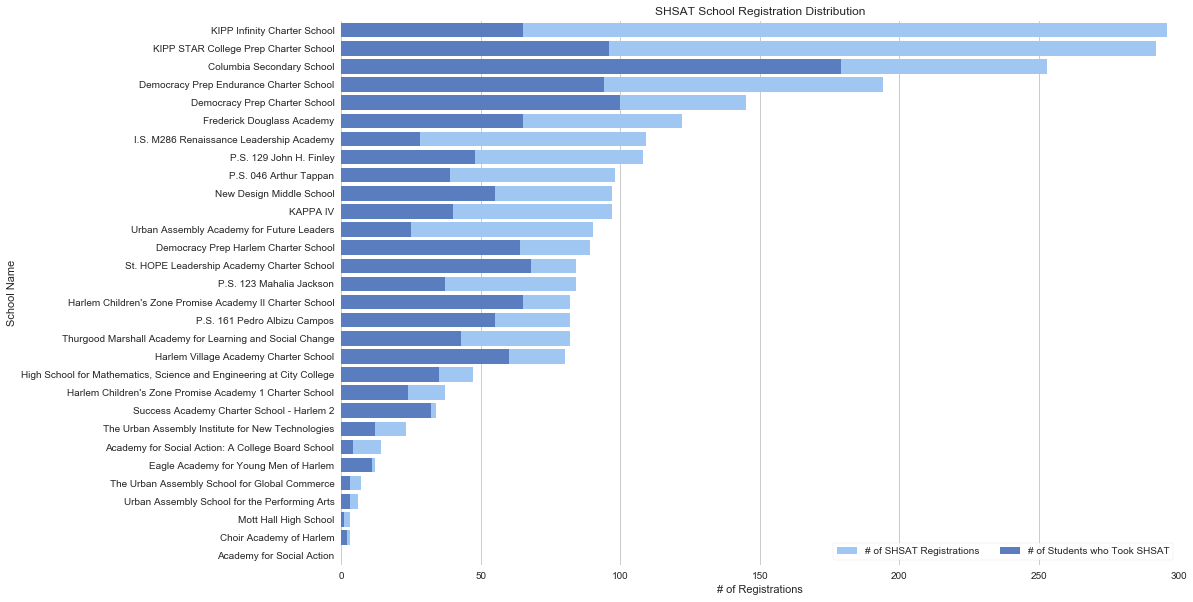

In [62]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15,10))

# PLot the total schools per city
sns.set_color_codes("pastel")
sns.barplot(x="Number of students who registered for the SHSAT", y='School name', data=shsat_sorted_df,
            label="# of SHSAT Registrations", color="b", ci=None)

# Plot the total community schools per city
sns.set_color_codes("muted")
sns.barplot(x="Number of students who took the SHSAT", y="School name", data=shsat_sorted_df,
            label="# of Students who Took SHSAT", color="b",ci=None)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,300), ylabel="School Name", title="SHSAT School Registration Distribution",
      xlabel="# of Registrations")
sns.despine(left=True, bottom=True)

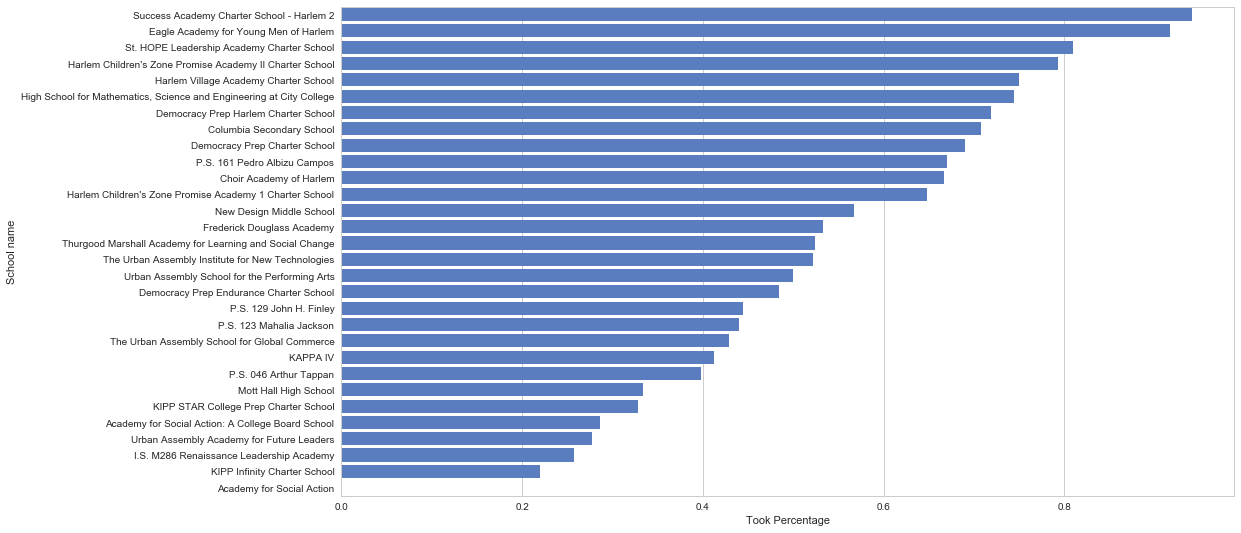

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
sns.barplot(y='School name', x='Took Percentage', data=shsat_sorted_df.sort_values('Took Percentage', ascending = False), ax=ax, orient='h', ci=None, color='b')

In [64]:
shsat_low_appearance_df = shsat_sorted_df[shsat_sorted_df['Took Percentage'] <= 0.4]
shsat_low_appearance_df.sort_values('Took Percentage')

,DBN,School name,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT,Year of SHST,Grade level,Took Percentage
22,84M336,KIPP Infinity Charter School,494,296,65,2016,8,0.219595
6,05M286,I.S. M286 Renaissance Leadership Academy,165,109,28,2015,8,0.256881
7,05M286,Urban Assembly Academy for Future Leaders,93,90,25,2016,8,0.277778
12,05M367,Academy for Social Action: A College Board School,254,14,4,2015,8,0.285714
29,84M726,KIPP STAR College Prep Charter School,292,292,96,2015,8,0.328767
9,05M304,Mott Hall High School,504,3,1,2014,8,0.333333
0,05M046,P.S. 046 Arthur Tappan,315,98,39,2013,8,0.397959


In [65]:
poor_schools_shsat_performance = list(np.unique(shsat_sorted_df['DBN']))
# poor_schools_shsat_performance = [i.strip().lower() for i in poor_schools_shsat_performance]

total_schools = list(set(df_schools['Location Code']))
# total_schools = [i.strip().lower() for i in total_schools]

intersection = list(set(poor_schools_shsat_performance).intersection(set(total_schools)))

print('Number of Intersecting schools = {}'.format(len(intersection)))

Number of Intersecting schools = 21


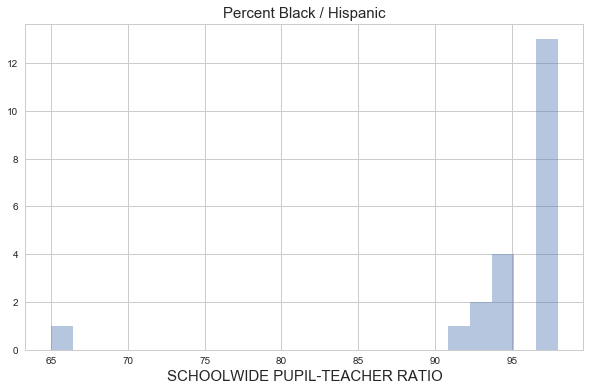

In [66]:
percent_black_hist = []
for school in intersection:
    percent_black_hist.append(list(df_schools[df_schools['Location Code'] == school]['Percent Black / Hispanic'])[0])
  
plt.figure(figsize=(10,6))
sns.distplot(percent_black_hist, kde=False)

temp = plt.title('Percent Black / Hispanic', fontsize=15)
temp = plt.xlabel(field_name, fontsize=15)

In [67]:
df_schools_minor = df_schools_raw[df_schools_raw['Percent Black / Hispanic'].astype(int)>70]
print(df_schools_minor.shape)

(829, 161)


In [68]:
def grade_minority_percent_4s (df, grade, subject):
    out_field = ('Grade %d %s Minority 4s')%(grade, subject)
    num1 = ('Grade %d %s 4s - Black or African American')%(grade, subject)
    num2 = ('Grade %d %s 4s - Hispanic or Latino')%(grade, subject)
    den = ('Grade %d %s 4s - All Students')%(grade, subject)
    df = df[df[den].astype(int)>5]
    df[out_field] = (df[num1] + df[num2])/(df[den])
    grade_minority_df = df[df[out_field]>0.7]
    print(grade, subject, df.shape, grade_minority_df.shape, (grade_minority_df[num1] + grade_minority_df[num2]).mean(), df[num1].mean(), df[num2].mean())
    return df

5 ELA (133, 162) (80, 162) 9.5625 4.0 3.8345864661654137
5 Math (175, 162) (107, 162) 10.897196261682243 4.377142857142857 5.428571428571429
6 ELA (143, 162) (93, 162) 12.698924731182796 6.2027972027972025 4.671328671328672
6 Math (185, 162) (122, 162) 17.639344262295083 7.383783783783784 7.335135135135135
7 ELA (104, 162) (61, 162) 11.60655737704918 4.0576923076923075 5.288461538461538
7 Math (115, 162) (70, 162) 15.142857142857142 5.426086956521739 6.7043478260869565


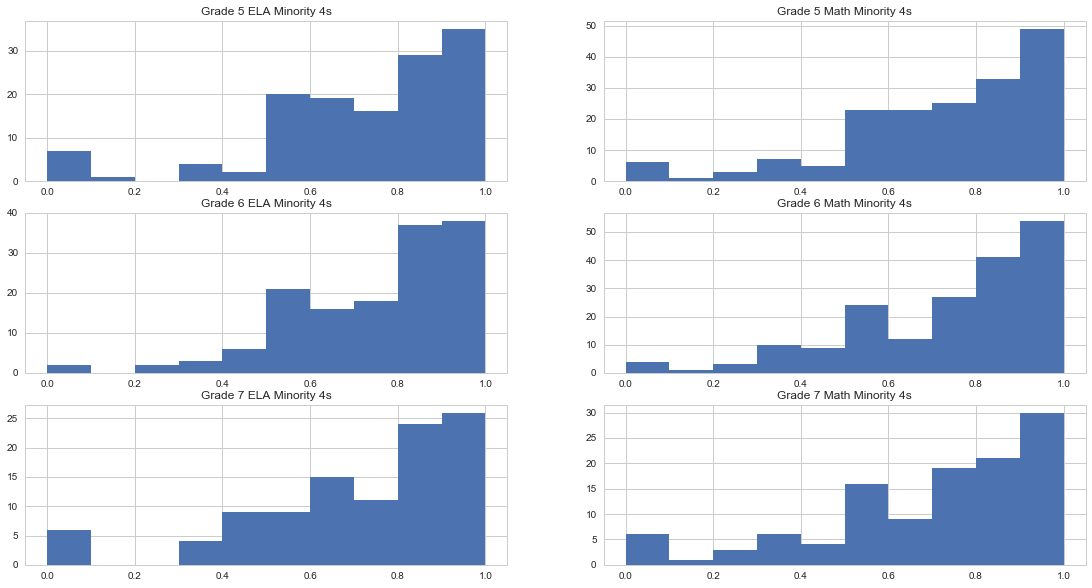

In [69]:
grades = [5,6,7]
subjects = ['ELA', 'Math']
i=1
plt.figure(figsize=[19,10])
df_all_schools = pd.DataFrame(columns=df_schools_minor.columns)
for grade,subject in itertools.product(grades, subjects):
    df_schools_tmp = grade_minority_percent_4s(df_schools_minor, grade, subject)
    
#     df_schools_tmp[]
    fname = ('Grade %d %s Minority 4s')%(grade, subject)
    plt.subplot(3,2,i)
    df_schools_tmp[fname].hist()
    df_schools_tmp.drop([fname], axis=1, inplace=True)
    plt.title(fname)
    df_all_schools = pd.concat([df_all_schools, df_schools_tmp])
    i += 1

In [71]:
def download_link(df, filename = "data.csv"):
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    title = "Download CSV file"
    html = '<button type="button" style="font-size: larger;  background-color: #FFFFFF; border: 0pt;"><a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a></button>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [72]:
dfn = df_all_schools.drop_duplicates()
print(dfn.shape)
download_link(dfn, 'top_performing_students.csv')

(355, 161)
